## 1. Importing libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

### Importing Data and labels

In [19]:
dataset=pd.read_csv(r"C:\Users\HP\Downloads\Image classification\Data.csv")
y=pd.read_csv(r"C:\Users\HP\Downloads\Image classification\classLabel.csv")

In [20]:
dataset.head()

,59,43,50,68,98,119,139,145,149,149.1,...,59.21,58.21,65.19,59.22,46.22,57.27,104.16,140.19,84.21,72.15
0,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
1,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
2,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
3,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80
4,159,150,153,154,138,184,154,77,61,64,...,15,18,16,12,13,16,14,14,17,19


In [21]:
dataset.shape

(9999, 3072)

### 2.1 Converting RGB Image into the grayscale image

In [22]:
import numpy as np
lst=[]
bw=[]
for i in range(len(dataset)):
    row = dataset.iloc[i]

    rgb_image = np.array(row).reshape(32, 32, 3)
    lst.append(rgb_image)
    bw_img = np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])
    bw.append(bw_img)

bw = np.array(bw)

### 2.2 Dividing the data set into two sets

In [5]:

from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(bw, test_size=0.3, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

from tensorflow.keras.utils import to_categorical



### 2.3 Building the Convolutional Neural Network

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax')) #op layer

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 3, 3, 128)        

### 2.3) Compiling the model and fitting it
 ##### Using the adam optimizer and categorical crossentropy and accuracy as the metric

In [34]:
import time

start_time = time.time()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #sys loss fun
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2) # stop criteria
end_time = time.time()
execution_time = end_time - start_time

print(f"Training Time: {execution_time:.2f} seconds")

Epoch 1/15
175/175 [==============================] - 16s 69ms/step - loss: 2.5576 - accuracy: 0.1699 - val_loss: 2.0585 - val_accuracy: 0.2600
Epoch 2/15
175/175 [==============================] - 11s 65ms/step - loss: 1.9674 - accuracy: 0.2827 - val_loss: 1.9299 - val_accuracy: 0.2886
Epoch 3/15
175/175 [==============================] - 11s 62ms/step - loss: 1.8012 - accuracy: 0.3313 - val_loss: 1.8116 - val_accuracy: 0.3293
Epoch 4/15
175/175 [==============================] - 11s 63ms/step - loss: 1.6821 - accuracy: 0.3902 - val_loss: 1.7312 - val_accuracy: 0.3743
Epoch 5/15
175/175 [==============================] - 12s 66ms/step - loss: 1.6019 - accuracy: 0.4067 - val_loss: 1.6277 - val_accuracy: 0.4064
Epoch 6/15
175/175 [==============================] - 13s 76ms/step - loss: 1.5094 - accuracy: 0.4495 - val_loss: 1.6163 - val_accuracy: 0.4093
Epoch 7/15
175/175 [==============================] - 13s 73ms/step - loss: 1.4086 - accuracy: 0.4813 - val_loss: 1.6170 - val_accuracy:

### Plotting the graph

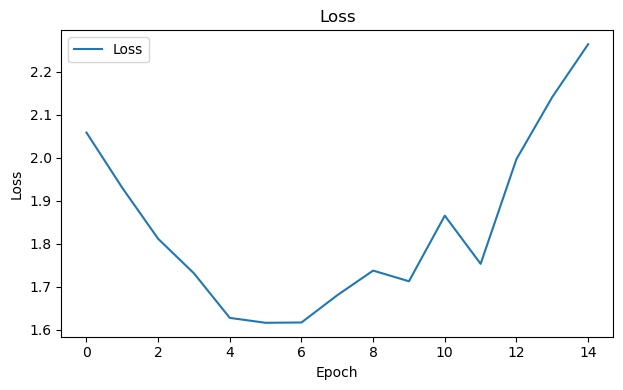

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 2.5 Testing Procedure
Evaluating the classifier by the accuracy measurement on X_test.

$$
ACC_{D_{test}} = \frac{1}{|D_{test}|} \sum_{i=1}^{|D_{test}|} L(\hat{y}_i, y_i)
$$

where $\hat{y}_i$ is the assigned class label by the classifier and $y_i$ is the true class label of a data instance $x_i$ in $D_{test}$, and $|D_{test}|$ is the number of data instances in $D_{test}$.

$L(\hat{y}_i, y_i) = \begin{cases} 1 & \text{if } \hat{y}_i = y_i \\ 0 & \text{if } \hat{y}_i \neq y_i \end{cases}$


In [36]:
history

In [37]:

y_pred_probs = model.predict(x_test)

y_pred_labels = np.argmax(y_pred_probs, axis=1)


y_pred_labels = pd.DataFrame(y_pred_labels,columns=["6"])


y_test, y_pred_labels = y_test.align(y_pred_labels, axis=1)


y_test = y_test.reset_index(drop=True)
y_pred_labels = y_pred_labels.reset_index(drop=True)


total_correct = np.sum(y_pred_labels == y_test)


total_samples = len(y_pred_labels)

accuracy = total_correct[0]/ (total_samples)

print(f"Total Correct Predictions: {total_correct}")
print(f"Total Number of Actual Samples: {total_samples}")
print(f"Accuracy: {accuracy * 100:.2f}%")

94/94 [==============================] - 2s 16ms/step
Total Correct Predictions: 6    1352
dtype: int64
Total Number of Actual Samples: 3000
Accuracy: 45.07%


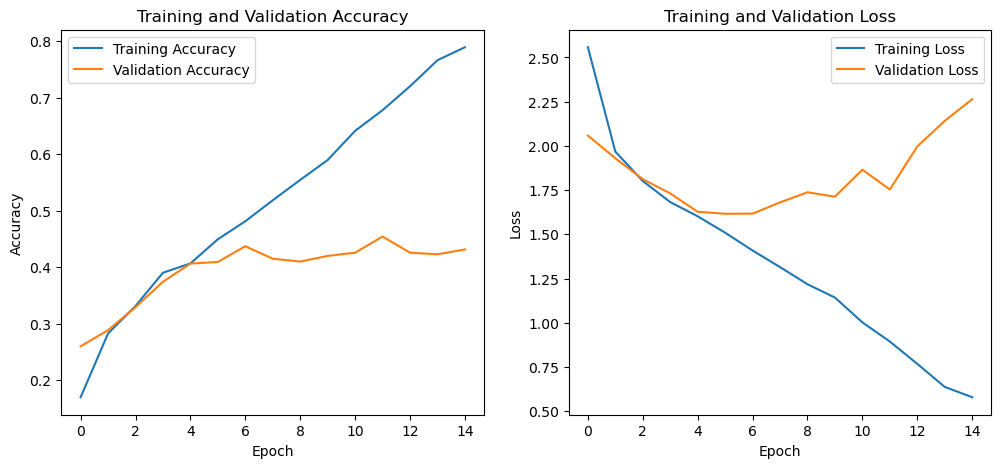

In [38]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()